# Exploratory Data Analysis

In [1]:
# During the Exploratory Data Analysis (EDA) Phase of this Capstone Project 1, I generated the PandasProfilingReport.html 
#   file through another Jupyter Notebook (Capstone Project 1 - DataFrame Pandas Profiling). I did this because of the large
#   number of variables in the file (150 variables.)
#   In looking at the results, I focused on finding if there were correlations between some of the variables.
#   Below I first load a smaller sample of the modeling data, and then I focus on a few variables to see if they are correlated

In [2]:
import pandas as pd
import pandas_profiling
import numpy as np

In [3]:
#   1) LOADING THE LENDING CLUB accepted_2007_to_2018Q4.csv FILE WHILE FILTERING DOWN TO 2017-2018 DATA
apprTemp = []
df1 = pd.DataFrame()

# file to load
filename = r"C:\Users\olivi\Documents\Olivier\Training\Springboard Learning\Data Science Career Track\Capstone Project 1\Idea3 - Predicting Full Payment on LendingClub Lease Applications\datasets\accepted_2007_to_2018Q4.csv"

# use chunk size 100000
c_size = 100000

import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')

for approved_chunk in pd.read_csv(filename,chunksize=c_size, iterator=True, low_memory=False):  
    
    # Filtering records via regular expression such that only records for the year 2018 are kept
    approved = approved_chunk[approved_chunk['issue_d'].str.contains('2018',na=False, regex=True)]
    
    # Putting the filtered data back together by appending each chunk to the next
    apprTemp.append(approved)

In [4]:
#   1) CONTINUED...
print("Database: CONCATENATING PROCESSED CHUNKS INTO A SINGLE DATAFRAME")
# CONCATENATING PROCESSED DATA
df1 = pd.concat(apprTemp)
print("Database: LOADED")
df1.info()

Database: CONCATENATING PROCESSED CHUNKS INTO A SINGLE DATAFRAME
Database: LOADED
<class 'pandas.core.frame.DataFrame'>
Int64Index: 495242 entries, 421097 to 1611876
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 574.3+ MB


In [5]:
sample_subset = df1.sample(frac=0.50)

In [6]:
sample_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247621 entries, 1357319 to 466424
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 287.2+ MB


In [7]:
sample_subset.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247621 entries, 1357319 to 466424
Data columns (total 151 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   id                                          247621 non-null  object 
 1   member_id                                   0 non-null       float64
 2   loan_amnt                                   247621 non-null  float64
 3   funded_amnt                                 247621 non-null  float64
 4   funded_amnt_inv                             247621 non-null  float64
 5   term                                        247621 non-null  object 
 6   int_rate                                    247621 non-null  float64
 7   installment                                 247621 non-null  float64
 8   grade                                       247621 non-null  object 
 9   sub_grade                                   247621 non-null  ob

In [8]:
# I wanted to see if there was a correlation between fico score and Performance based on loan status
#    My assumption was that there would be a clear correlation between the Fico Score and Performance.

# I first took a look at the distribution of unique values in loan status
sample_subset.loan_status.value_counts()

Current               213605
Fully Paid             23724
Charged Off             4357
Late (31-120 days)      3690
In Grace Period         1446
Late (16-30 days)        794
Default                    5
Name: loan_status, dtype: int64

In [9]:
# From the results above, I then created a new variable named Performance where Performance can take on three values: 
#   1) Good, 2) Bad, or 3) Indeterminate.

#   1) I then defined as Good: records for which the loan_status is either 'Current' or 'Fully Paid'.
Good = ['Current','Fully Paid']
sample_subset.loc[(sample_subset['loan_status'].isin(Good)),'Performance'] = 'Good'

#   2) I then defined as Bad: records for which the loan_status is either 'Late (16-30 days)', 'Late (31-120 days)' or 'Charged Off'
Bad = ['Late (16-30 days)','Late (31-120 days)','Charged Off']
sample_subset.loc[(sample_subset['loan_status'].isin(Bad)),'Performance'] = 'Bad'

#   3) I then defined as Indeterminate: records for which the loan_status is 'In Grace Period', or 'Default'
Indeterminate = ['In Grace Period','Default']
sample_subset.loc[(sample_subset['loan_status'].isin(Indeterminate)),'Performance'] = 'Indeterminate'

# Then I took a look at distribution of records by the Performance variable I created above
sample_subset.Performance.value_counts()

Good             237329
Bad                8841
Indeterminate      1451
Name: Performance, dtype: int64

In [30]:
# I next got the average fico_range_low by Performance
fico_low_mean = sample_subset.groupby('Performance').fico_range_low.mean()

# Then I got the average fico_range_high by Performance
fico_high_mean = sample_subset.groupby('Performance').fico_range_high.mean()

print('\n',fico_low_mean)
print('\n',fico_high_mean)


 Performance
Bad              698.960525
Good             706.786191
Indeterminate    695.062026
Name: fico_range_low, dtype: float64

 Performance
Bad              702.960977
Good             710.786549
Indeterminate    699.062026
Name: fico_range_high, dtype: float64


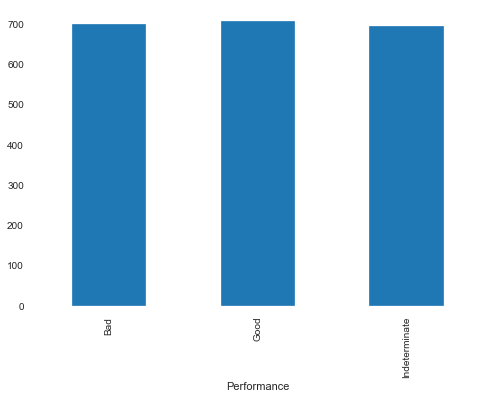

In [31]:
import matplotlib.pyplot as plt

# Below I took a look at the Mean Performance by fico_range_low in a bar graph. 
fico_low_mean.plot(x ='Performance', y='fico_range_low', kind = 'bar')

In [32]:
# As shown above, there wasn't much variance in the average fico_range_low by Performance

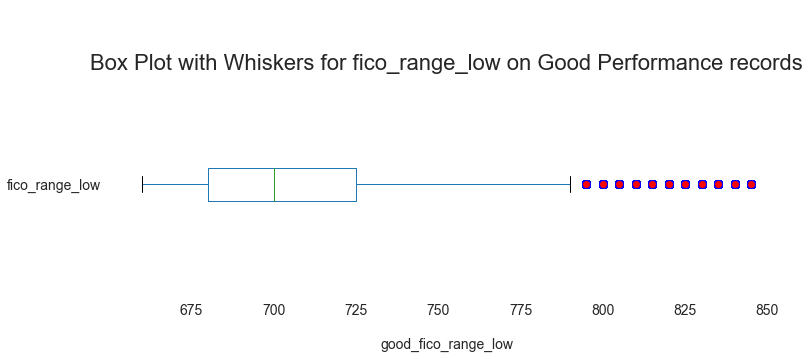

The absolute minimum for good_fico_range_low is:  660.0
The absolute maximum for good_fico_range_low is:  845.0

The Lower Whisker for good_fico_range_low is:  660.0
The Lower Quartile for good_fico_range_low is:  680.0
The Median for good_fico_range_low is:  700.0
The Inter Quartile Range (IQR) for good_fico_range_low is:  45.0
The Upper Quartile for good_fico_range_low is:  725.0
The Upper Whisker for good_fico_range_low is:  790.0
____________________________________________________________________________________________________________________


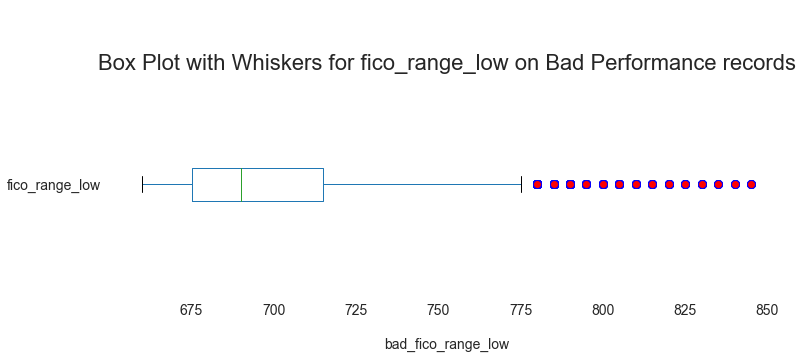

The absolute minimum for bad_fico_range_low is:  660.0
The absolute maximum for bad_fico_range_low is:  845.0

The Lower Whisker for bad_fico_range_low is:  660.0
The Lower Quartile for bad_fico_range_low is:  675.0
The Median for bad_fico_range_low is:  690.0
The Inter Quartile Range (IQR) for bad_fico_range_low is:  40.0
The Upper Quartile for bad_fico_range_low is:  715.0
The Upper Whisker for bad_fico_range_low is:  775.0
____________________________________________________________________________________________________________________


In [81]:
# I next wanted to see this variable within a box plot to get more details by comparing Good Performance to Bad
import numpy as np

good_fico_range_low = sample_subset.loc[sample_subset['Performance'] == 'Good', 'fico_range_low']
bad_fico_range_low = sample_subset.loc[sample_subset['Performance'] == 'Bad', 'fico_range_low']

circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
good_fico_range_low.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('\ngood_fico_range_low', fontsize=14)
plt.title('\n\nBox Plot with Whiskers for fico_range_low on Good Performance records', fontsize=22)
plt.show()

gfrl_min = np.min(good_fico_range_low)
print('The absolute minimum for good_fico_range_low is: ',gfrl_min)
gfrl_max = np.max(good_fico_range_low)
print('The absolute maximum for good_fico_range_low is: ',gfrl_max)

gfrl_lower_quartile = np.percentile(good_fico_range_low, 25)
gfrl_upper_quartile = np.percentile(good_fico_range_low, 75)
gfrl_iqr = gfrl_upper_quartile - gfrl_lower_quartile
gfrl_lower_whisker = good_fico_range_low[good_fico_range_low>=gfrl_lower_quartile-1.5*gfrl_iqr].min()
gfrl_median = np.median(good_fico_range_low)
gfrl_upper_whisker = good_fico_range_low[good_fico_range_low<=gfrl_upper_quartile+1.5*gfrl_iqr].max()
print('\nThe Lower Whisker for good_fico_range_low is: ',gfrl_lower_whisker)
print('The Lower Quartile for good_fico_range_low is: ',gfrl_lower_quartile)
print('The Median for good_fico_range_low is: ',gfrl_median)
print('The Inter Quartile Range (IQR) for good_fico_range_low is: ',gfrl_iqr)
print('The Upper Quartile for good_fico_range_low is: ',gfrl_upper_quartile)
print('The Upper Whisker for good_fico_range_low is: ',gfrl_upper_whisker)
print('____________________________________________________________________________________________________________________')

bad_fico_range_low.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('\nbad_fico_range_low', fontsize=14)
plt.title('\n\nBox Plot with Whiskers for fico_range_low on Bad Performance records', fontsize=22)
plt.show()

bfrl_min = np.min(bad_fico_range_low)
print('The absolute minimum for bad_fico_range_low is: ',bfrl_min)
bfrl_max = np.max(bad_fico_range_low)
print('The absolute maximum for bad_fico_range_low is: ',bfrl_max)

bfrl_lower_quartile = np.percentile(bad_fico_range_low, 25)
bfrl_upper_quartile = np.percentile(bad_fico_range_low, 75)
bfrl_iqr = bfrl_upper_quartile - bfrl_lower_quartile
bfrl_lower_whisker = bad_fico_range_low[bad_fico_range_low>=bfrl_lower_quartile-1.5*bfrl_iqr].min()
bfrl_median = np.median(bad_fico_range_low)
bfrl_upper_whisker = bad_fico_range_low[bad_fico_range_low<=bfrl_upper_quartile+1.5*bfrl_iqr].max()
print('\nThe Lower Whisker for bad_fico_range_low is: ',bfrl_lower_whisker)
print('The Lower Quartile for bad_fico_range_low is: ',bfrl_lower_quartile)
print('The Median for bad_fico_range_low is: ',bfrl_median)
print('The Inter Quartile Range (IQR) for bad_fico_range_low is: ',bfrl_iqr)
print('The Upper Quartile for bad_fico_range_low is: ',bfrl_upper_quartile)
print('The Upper Whisker for bad_fico_range_low is: ',bfrl_upper_whisker)
print('____________________________________________________________________________________________________________________')

In [ ]:
# As shown above for fico_range_low, there were slight differences between the Good and Bad Performance records, but nothing
#   too remarkable.

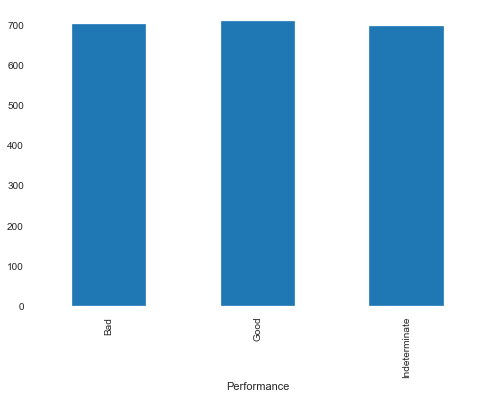

In [18]:
# Then I took a look at the Mean Performance by fico_range_high in a bar graph. 
fico_high_mean.plot(x ='Performance', y='fico_range_high', kind = 'bar')

In [ ]:
# Again, as shown above, there wasn't much variance in the average fico_range_high by Performance

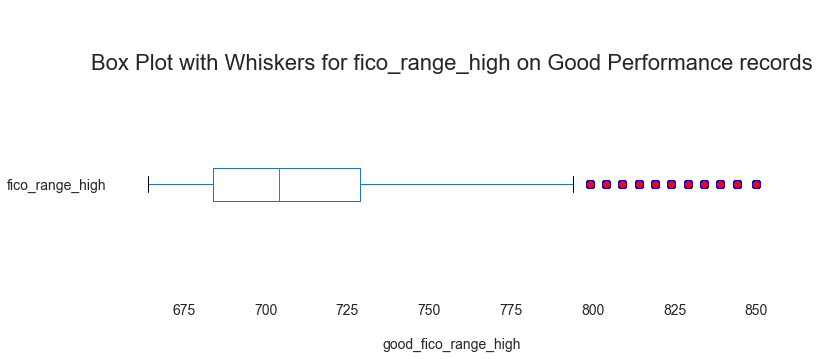

The absolute minimum for good_fico_range_high is:  664.0
The absolute maximum for good_fico_range_high is:  850.0

The Lower Whisker for good_fico_range_high is:  664.0
The Lower Quartile for good_fico_range_high is:  684.0
The Median for good_fico_range_high is:  704.0
The Inter Quartile Range (IQR) for good_fico_range_high is:  45.0
The Upper Quartile for good_fico_range_high is:  729.0
The Upper Whisker for good_fico_range_high is:  794.0
____________________________________________________________________________________________________________________


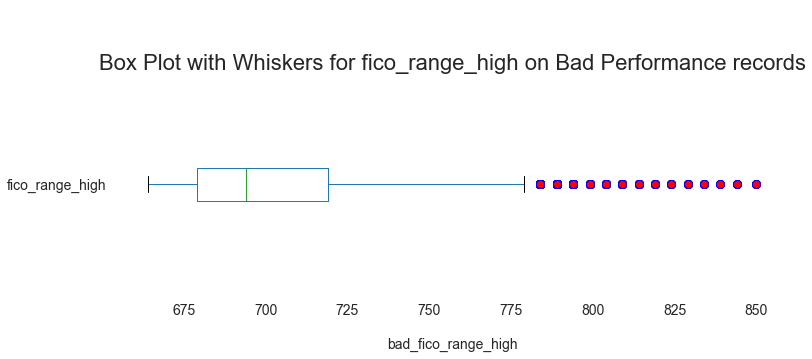

The absolute minimum for bad_fico_range_high is:  664.0
The absolute maximum for bad_fico_range_high is:  850.0

The Lower Whisker for bad_fico_range_high is:  664.0
The Lower Quartile for bad_fico_range_high is:  679.0
The Median for bad_fico_range_high is:  694.0
The Inter Quartile Range (IQR) for bad_fico_range_high is:  40.0
The Upper Quartile for bad_fico_range_high is:  719.0
The Upper Whisker for bad_fico_range_high is:  779.0
____________________________________________________________________________________________________________________


In [83]:
# I next wanted to see this variable within a box plot to get more details by comparing Good Performance to Bad

good_fico_range_high = sample_subset.loc[sample_subset['Performance'] == 'Good', 'fico_range_high']
bad_fico_range_high = sample_subset.loc[sample_subset['Performance'] == 'Bad', 'fico_range_high']

circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
good_fico_range_high.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('\ngood_fico_range_high', fontsize=14)
plt.title('\n\nBox Plot with Whiskers for fico_range_high on Good Performance records', fontsize=22)
plt.show()

gfrh_min = np.min(good_fico_range_high)
print('The absolute minimum for good_fico_range_high is: ',gfrh_min)
gfrh_max = np.max(good_fico_range_high)
print('The absolute maximum for good_fico_range_high is: ',gfrh_max)

gfrh_lower_quartile = np.percentile(good_fico_range_high, 25)
gfrh_upper_quartile = np.percentile(good_fico_range_high, 75)
gfrh_iqr = gfrh_upper_quartile - gfrh_higher_quartile
gfrh_lower_whisker = good_fico_range_high[good_fico_range_high>=gfrh_lower_quartile-1.5*gfrh_iqr].min()
gfrh_median = np.median(good_fico_range_high)
gfrh_upper_whisker = good_fico_range_high[good_fico_range_high<=gfrh_upper_quartile+1.5*gfrh_iqr].max()
print('\nThe Lower Whisker for good_fico_range_high is: ',gfrh_lower_whisker)
print('The Lower Quartile for good_fico_range_high is: ',gfrh_lower_quartile)
print('The Median for good_fico_range_high is: ',gfrh_median)
print('The Inter Quartile Range (IQR) for good_fico_range_high is: ',gfrh_iqr)
print('The Upper Quartile for good_fico_range_high is: ',gfrh_upper_quartile)
print('The Upper Whisker for good_fico_range_high is: ',gfrh_upper_whisker)
print('____________________________________________________________________________________________________________________')

bad_fico_range_high.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('\nbad_fico_range_high', fontsize=14)
plt.title('\n\nBox Plot with Whiskers for fico_range_high on Bad Performance records', fontsize=22)
plt.show()

bfrh_min = np.min(bad_fico_range_high)
print('The absolute minimum for bad_fico_range_high is: ',bfrh_min)
bfrh_max = np.max(bad_fico_range_high)
print('The absolute maximum for bad_fico_range_high is: ',bfrh_max)

bfrh_lower_quartile = np.percentile(bad_fico_range_high, 25)
bfrh_upper_quartile = np.percentile(bad_fico_range_high, 75)
bfrh_iqr = bfrh_upper_quartile - bfrh_higher_quartile
bfrh_lower_whisker = bad_fico_range_high[bad_fico_range_high>=bfrh_lower_quartile-1.5*bfrh_iqr].min()
bfrh_median = np.median(bad_fico_range_high)
bfrh_upper_whisker = bad_fico_range_high[bad_fico_range_high<=bfrh_upper_quartile+1.5*bfrh_iqr].max()
print('\nThe Lower Whisker for bad_fico_range_high is: ',bfrh_lower_whisker)
print('The Lower Quartile for bad_fico_range_high is: ',bfrh_lower_quartile)
print('The Median for bad_fico_range_high is: ',bfrh_median)
print('The Inter Quartile Range (IQR) for bad_fico_range_high is: ',bfrh_iqr)
print('The Upper Quartile for bad_fico_range_high is: ',bfrh_upper_quartile)
print('The Upper Whisker for bad_fico_range_high is: ',bfrh_upper_whisker)
print('____________________________________________________________________________________________________________________')

In [ ]:
# As shown above for fico_range_high, there were slight differences between the Good and Bad Performance records, but nothing
#   too remarkable.

In [13]:
# My assumption was that there would be a high variance between at least Good and Bad Performance based on Fico Score. 
#   That was proved to not be the case.

# Then I got the Performance distribution by Purpose as the assumption was that the Purpose of taking the loan might
#   explain the performance on the loan.
prp = sample_subset.groupby(['purpose','Performance']).Performance.count()

In [84]:
print(prp)

purpose             Performance  
car                 Bad                  80
                    Good               2393
                    Indeterminate        16
credit_card         Bad                1588
                    Good              61939
                    Indeterminate       300
debt_consolidation  Bad                4660
                    Good             124270
                    Indeterminate       793
home_improvement    Bad                 585
                    Good              15762
                    Indeterminate        98
house               Bad                 158
                    Good               2536
                    Indeterminate        21
major_purchase      Bad                 302
                    Good               5450
                    Indeterminate        37
medical             Bad                 184
                    Good               3156
                    Indeterminate        16
moving              Bad                  9

Text(0.5, 1.0, 'Frequencies of Performance by Purpose of Loan')

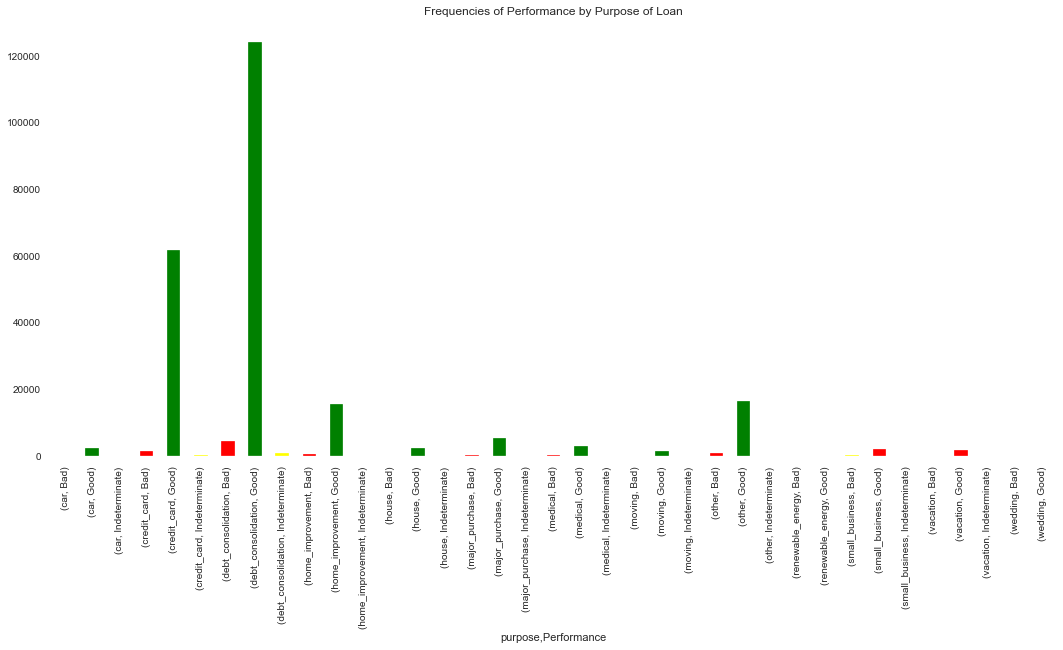

In [85]:
# As shown above the most important purpose for taking a loan was debt consolidation followed by 
#   credit card (assumming paying off credit cards)

# Simply looking at the numbers wasn't enough to really see a correlation between the Purpose for taking a loan
#   and the Performance, so I decided to get a visual by creating the bar graph below.
plt.figure(figsize=(18,8))
prp.plot(x =['purpose','Performance'], y='count' , kind = 'bar', color=['red','green','yellow'])
plt.title('Frequencies of Performance by Purpose of Loan')

In [86]:
# In looking at the bar chart above, it wasn't very clear if there was a correlation between the Purpose for taking a loan
#   and the Performance. One takeaway seemed to be that the number of Good for debt_consolidation seemed to be twice as the
#   number of Good for credit_card, while the number of Bad for debt_consolidation seemed to be 3 times that of credit_card,
#   which would indicate that it would be riskier to approve loans when the purpose was debt_consolidation.